In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

from PIL import Image

In [2]:
B_COEF = [2, 4]
IMG_SIZE = 512 * 512
BYTES_TO_BITS = 8
PATH_AE = "test_images_results"
PATH_JPEG = "jpeg_images"
PATH_UNCOMPRESSED = "test_images"

In [3]:
def calculate_bpp_and_psnr(img_name, uncompressed_img, is_ae):
    img = Image.open(img_name)
    if is_ae:
        img_file_size = os.path.getsize(img_name[:-4] + ".txt")
    else:
        img_file_size = os.path.getsize(img_name)
    cur_bpp = img_file_size * BYTES_TO_BITS / IMG_SIZE
    cur_psnr = cv2.PSNR(np.asarray(uncompressed_img), np.asarray(img))
    img.close()
    return cur_bpp, cur_psnr


def collect_statistics(name, is_ae=True):
    uncompressed_img = Image.open(f'{PATH_UNCOMPRESSED}/{name}.png')
    bpp = []
    psnr = []
    if is_ae:
        templates = [f'{PATH_AE}/{i}/{name}.png' for i in B_COEF]
    else:
        templates = [f'{PATH_JPEG}/approx_{i}/{name}.jpg' for i in B_COEF]

    for mask in templates:
        cur_bpp, cur_psnr = calculate_bpp_and_psnr(mask, uncompressed_img, is_ae)
        bpp.append(cur_bpp)
        psnr.append(cur_psnr)

    uncompressed_img.close()
    return bpp, psnr

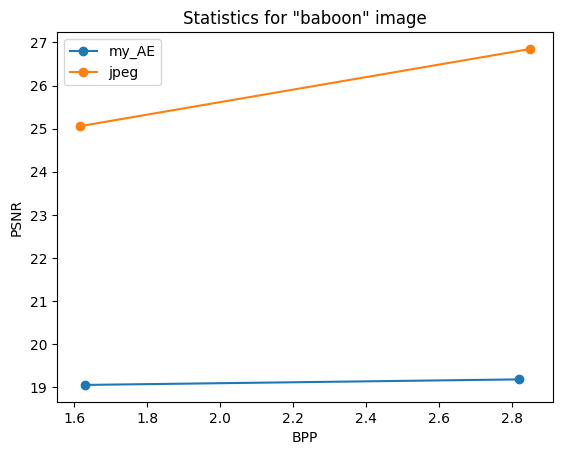

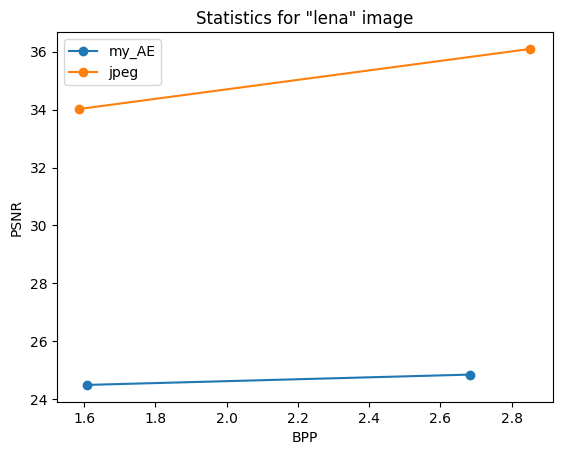

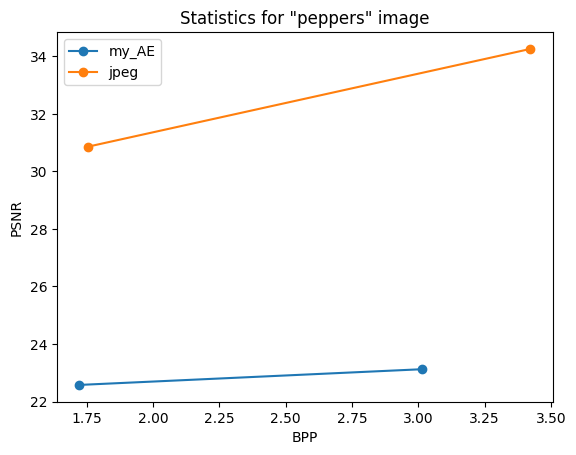

In [4]:
for name in ["baboon", "lena", "peppers"]:
    for mode in [True, False]:
        bpp, psnr = collect_statistics(name, mode)
        plt.plot(bpp, psnr, 'o-', label="my_AE" if mode else "jpeg")
    plt.title(f'Statistics for \"{name}\" image')
    plt.xlabel("BPP")
    plt.ylabel("PSNR")
    plt.legend(loc="upper left")
    plt.show()